In [ ]:
!pip install -q datasets flash_attn timm einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 33.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 3.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd

# Function to generate a CSV file from folder structure
def create_csv_from_folders(data_dir, output_csv_path):
    image_paths = []
    labels = []

    # Loop through each folder (which represents a class)
    for label in os.listdir(data_dir):
        label_path = os.path.join(data_dir, label)

        # Check if it's a directory (and not a file)
        if os.path.isdir(label_path):
            # Loop through each image in the class folder
            for image_name in os.listdir(label_path):
                image_path = os.path.join(label_path, image_name)

                # Check if it's an image file (you can filter specific extensions)
                if image_name.endswith(('.jpg', '.jpeg', '.png')):
                    image_paths.append(image_path)
                    labels.append(label)

    # Create a DataFrame with two columns: image_path and label
    df = pd.DataFrame({
        'image_path': image_paths,
        'label': labels
    })

    # # Save the DataFrame as a CSV file
    # df.to_csv(output_csv_path, index=False)
    # print(f"CSV file created at: {output_csv_path}")
    return df

# Define the paths
train_dir = '/content/drive/MyDrive/FLIPKART_TEST'  # Replace with your actual path
# test_dir = '/path/to/dataset/test'    # Replace with your actual path

train_csv = 'train.csv'
# test_csv = 'test.csv'

# Create CSV for train and test datasets
ds_train=create_csv_from_folders(train_dir, train_csv)
# ds_test=create_csv_from_folders(test_dir, test_csv)


In [ ]:
import pandas as pd
import re
import random
df1 = pd.DataFrame(ds_train)

# Function to extract the fruit name from the image path
def update_fresh_label(row):
    if row['label'] == 'fresh':
        # Extract the part of the filename that follows "fresh"
        match = re.search(r'fresh(\w+)', row['image_path'])
        if match:
            return f"fresh{match.group(1)}"
    elif row['label'] == 'rotten':
        # Extract the part of the filename that follows "fresh"
        match = re.search(r'rotten(\w+)', row['image_path'])
        if match:
            return f"rotten{match.group(1)}"
    return row['label']

# Apply the function to update the labels
df1['label'] = df1.apply(update_fresh_label, axis=1)

# Function to assign freshness index based on label
def assign_freshness(label):
    if label.startswith('rotten'):
        return f"{label}_with freshness index {random.randint(1, 4)}"
    elif label.startswith('fresh'):
        return f"{label}__with freshness index {random.randint(6, 9)}"
    return label  # In case there are other labels

# Apply the function to the 'label' column
df1['label'] = df1['label'].apply(assign_freshness)
# Print the updated DataFrame
print(df1)
ds_train=df1
# Optional: Save the updated DataFrame to CSV
# df.to_csv('updated_fresh_dataset.csv', index=False)


                                             image_path  \
0     /content/drive/MyDrive/FLIPKART_TEST/rotten/ro...   
1     /content/drive/MyDrive/FLIPKART_TEST/rotten/ro...   
2     /content/drive/MyDrive/FLIPKART_TEST/rotten/ro...   
3     /content/drive/MyDrive/FLIPKART_TEST/rotten/ro...   
4     /content/drive/MyDrive/FLIPKART_TEST/rotten/ro...   
...                                                 ...   
1060  /content/drive/MyDrive/FLIPKART_TEST/fresh/fre...   
1061  /content/drive/MyDrive/FLIPKART_TEST/fresh/fre...   
1062  /content/drive/MyDrive/FLIPKART_TEST/fresh/fre...   
1063  /content/drive/MyDrive/FLIPKART_TEST/fresh/fre...   
1064  /content/drive/MyDrive/FLIPKART_TEST/fresh/fre...   

                                      label  
0      rottenApple_2_with freshness index 2  
1      rottenApple_1_with freshness index 3  
2      rottenApple_3_with freshness index 3  
3      rottenApple_2_with freshness index 1  
4      rottenApple_1_with freshness index 1  
...            

In [ ]:
from datasets import concatenate_datasets, DatasetDict

# Filter the dataset to get 100 examples with labels that start with "rotten"
rotten_dataset = hf_dataset.filter(lambda example: example['label'].startswith('rotten')).select(range(100))

# Filter the dataset to get 100 examples with labels that start with "fresh"
fresh_dataset = hf_dataset.filter(lambda example: example['label'].startswith('fresh')).select(range(100))

# Concatenate the 100 "rotten" and 100 "fresh" examples into a single training dataset
train_dataset = concatenate_datasets([rotten_dataset, fresh_dataset])

# Create a test dataset (selecting 30 examples, as in your original code)
test_dataset = hf_dataset.select(range(500, 530))  # Adjust indices as needed for your data

# Create the DatasetDict
dataset_dict = DatasetDict({
    'train': train_dataset,
    'test': test_dataset
})

# Example: Accessing the first image in the train dataset
# image = dataset_dict['train'][0]['image']
# image.show()  # This will display the image if you're running this in an environment with a display

# Check the structure of the DatasetDict
print(dataset_dict)


Filter:   0%|          | 0/1065 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1065 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'image'],
        num_rows: 200
    })
    test: Dataset({
        features: ['label', 'image'],
        num_rows: 30
    })
})


In [ ]:
ds_train=dataset_dict['train']
ds_test=dataset_dict['test']


In [ ]:
new_df = pd.concat([ds_train.head(100), ds_train.tail(100)], ignore_index=True)
shuffled_df = new_df.sample(frac=1, random_state=42).reset_index(drop=True)
ds_train1=shuffled_df
ds_train1

,image_path,label
0,/content/drive/MyDrive/FLIPKART_TEST/rotten/ro...,rotten
1,/content/drive/MyDrive/FLIPKART_TEST/rotten/ro...,rotten
2,/content/drive/MyDrive/FLIPKART_TEST/rotten/ro...,rotten
3,/content/drive/MyDrive/FLIPKART_TEST/fresh/fre...,fresh
4,/content/drive/MyDrive/FLIPKART_TEST/fresh/fre...,fresh
...,...,...
195,/content/drive/MyDrive/FLIPKART_TEST/fresh/fre...,fresh
196,/content/drive/MyDrive/FLIPKART_TEST/rotten/ro...,rotten
197,/content/drive/MyDrive/FLIPKART_TEST/rotten/ro...,rotten
198,/content/drive/MyDrive/FLIPKART_TEST/fresh/fre...,fresh


In [ ]:
num_rows = len(ds_train)

# Calculate the start and end indices for the middle 100 instances
start_idx = (num_rows - 100) // 2
end_idx = start_idx + 100

# Get the middle 100 rows
middle_df = ds_train.iloc[start_idx:end_idx]

# Shuffle the middle 100 rows
shuffled_middle_df = middle_df.sample(frac=1).reset_index(drop=True)
ds_test1=shuffled_middle_df
ds_test1

,image_path,label
0,/content/drive/MyDrive/FLIPKART_TEST/fresh/fre...,fresh
1,/content/drive/MyDrive/FLIPKART_TEST/fresh/fre...,fresh
2,/content/drive/MyDrive/FLIPKART_TEST/fresh/fre...,fresh
3,/content/drive/MyDrive/FLIPKART_TEST/rotten/ro...,rotten
4,/content/drive/MyDrive/FLIPKART_TEST/rotten/ro...,rotten
...,...,...
95,/content/drive/MyDrive/FLIPKART_TEST/fresh/fre...,fresh
96,/content/drive/MyDrive/FLIPKART_TEST/fresh/fre...,fresh
97,/content/drive/MyDrive/FLIPKART_TEST/fresh/fre...,fresh
98,/content/drive/MyDrive/FLIPKART_TEST/rotten/ro...,rotten


In [ ]:
from transformers import AutoModelForCausalLM, AutoProcessor
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = AutoModelForCausalLM.from_pretrained("microsoft/Florence-2-base-ft", trust_remote_code=True, revision='refs/pr/6').to(device)

processor = AutoProcessor.from_pretrained("microsoft/Florence-2-base-ft", trust_remote_code=True, revision='refs/pr/6')
torch.cuda.empty_cache()

cuda


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/2.43k [00:00<?, ?B/s]

configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/464M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base-ft:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# Function to run the model on an example
def run_example(task_prompt, text_input, image):
    prompt = task_prompt + text_input

    # Ensure the image is in RGB mode
    if image.mode != "RGB":
        image = image.convert("RGB")

    inputs = processor(text=prompt, images=image, return_tensors="pt").to(device)
    generated_ids = model.generate(
        input_ids=inputs["input_ids"],
        pixel_values=inputs["pixel_values"],
        max_new_tokens=1024,
        num_beams=3
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(generated_text, task=task_prompt, image_size=(image.width, image.height))
    return parsed_answer


In [ ]:
from PIL import Image
import torch

EXAMPLE_IMAGE_PATH='/content/WhatsApp Image 2024-10-20 at 2.15.52 AM.jpeg'
image = Image.open(EXAMPLE_IMAGE_PATH)
# task = "<DocVQA>"

# # Text prompt specifically asking to extract expiry date, brand details, packet size, brand name, and MRP from the product label
# text = """
# <DocVQA> Please extract the following details from the product label in this image:
# 1. Expiry Date (formatted as MM/YYYY or DD/MM/YYYY).
# 2. Brand Details (name of the brand).
# 3. Packet Size (quantity or volume).
# 4. MRP (Maximum Retail Price).

{'OCR': '05 0724 04 0725'}
{'DocVQA': 'unanswerable'}
{'DocVQA': '40g'}
{'OPEN_VOCABULARY_DETECTION': '$3.49'}


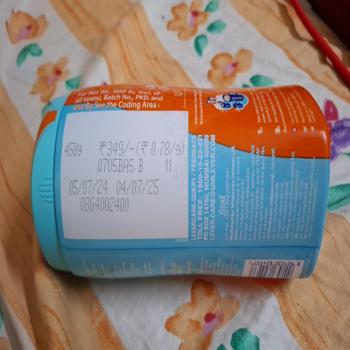

{'OCR': '05 0724 04 0725'}
{'DocVQA': 'unanswerable'}
{'DocVQA': '40g'}
{'OPEN_VOCABULARY_DETECTION': '$3.49'}


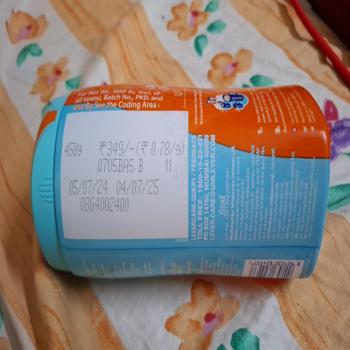

{'OCR': '05 0724 04 0725'}
{'DocVQA': 'unanswerable'}
{'DocVQA': '40g'}
{'OPEN_VOCABULARY_DETECTION': '$3.49'}


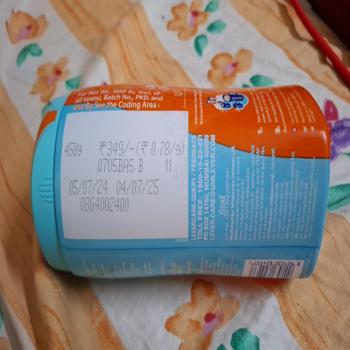

In [ ]:
# Loop through the dataset and run the DocVQA task to extract multiple details
for idx in range(3):
    # For each item in the dataset, ask questions about the expiry date, brand details, etc.

    # Asking for the expiry date
    print(run_example("OCR", 'What is the expiry date of the product ?', image))

    # Asking for the brand details (name of the brand)
    print(run_example("DocVQA", 'What is the brand name of the product?', image))

    # Asking for the packet size (quantity or volume)
    print(run_example("DocVQA", 'What is the packet size or quantity of the product?', image))

    # Asking for the MRP (Maximum Retail Price)
    print(run_example("OPEN_VOCABULARY_DETECTION", 'What is the cost of the product in Rupees?', image))

    # Display the image resized to 350x350 for better visualization
    display(image.resize([350, 350]))


{'DocVQA': 'rottenApple'}


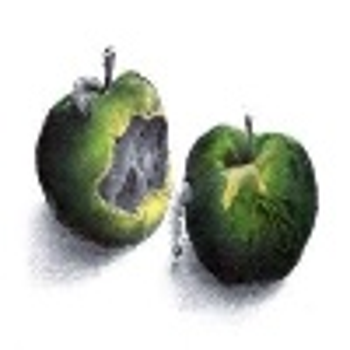

{'DocVQA': 'rottenApple'}


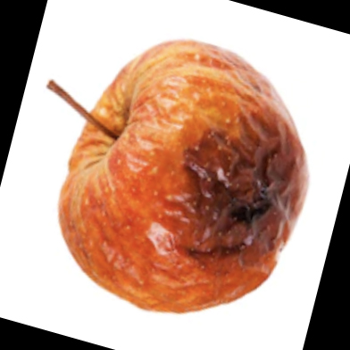

{'DocVQA': 'rottenApple'}


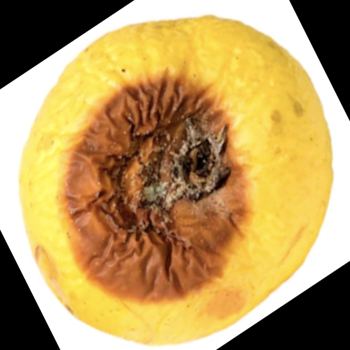

In [ ]:
for idx in range(3):
  print(run_example("DocVQA", 'What is the name of the fruit?', ds_train[idx]['image']))
  display(ds_train[idx]['image'].resize([350, 350]))

create a custo dataloader with `<DocVQA> `


In [ ]:
from torch.utils.data import Dataset

class DocVQADataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        example = self.data[idx]
        question = "<DocVQA>" +'What is the freshness index in the scale of 10?'
        answer = example['label']
        image = example['image']
        if image.mode != "RGB":
            image = image.convert("RGB")
        return question, answer, image


In [ ]:
import os
from torch.utils.data import DataLoader
from tqdm import tqdm
from transformers import (AdamW, AutoProcessor, get_scheduler)

def collate_fn(batch):
    questions, answers, images = zip(*batch)
    inputs = processor(text=list(questions), images=list(images), return_tensors="pt", padding=True).to(device)
    return inputs, answers

# Create datasets

train_dataset = DocVQADataset(ds_train)
val_dataset = DocVQADataset(ds_test)

# Create DataLoader
batch_size = 1
num_workers = 0

train_loader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=collate_fn, num_workers=num_workers, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=collate_fn, num_workers=num_workers)

In [ ]:
def train_model(train_loader, val_loader, model, processor, epochs=10, lr=1e-6):
    optimizer = AdamW(model.parameters(), lr=lr)
    num_training_steps = epochs * len(train_loader)
    lr_scheduler = get_scheduler(
        name="linear",
        optimizer=optimizer,
        num_warmup_steps=0,
        num_training_steps=num_training_steps,
    )

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        i = -1
        for batch in tqdm(train_loader, desc=f"Training Epoch {epoch + 1}/{epochs}"):
            i += 1
            inputs, answers = batch

            input_ids = inputs["input_ids"]
            pixel_values = inputs["pixel_values"]
            labels = processor.tokenizer(text=answers, return_tensors="pt", padding=True, return_token_type_ids=False).input_ids.to(device)

            outputs = model(input_ids=input_ids, pixel_values=pixel_values, labels=labels)
            loss = outputs.loss

            loss.backward()
            optimizer.step()
            lr_scheduler.step()
            optimizer.zero_grad()

            train_loss += loss.item()

        avg_train_loss = train_loss / len(train_loader)
        print(f"Average Training Loss: {avg_train_loss}")

        # Validation phase
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch in tqdm(val_loader, desc=f"Validation Epoch {epoch + 1}/{epochs}"):
                inputs, answers = batch

                input_ids = inputs["input_ids"]
                pixel_values = inputs["pixel_values"]
                labels = processor.tokenizer(text=answers, return_tensors="pt", padding=True, return_token_type_ids=False).input_ids.to(device)

                outputs = model(input_ids=input_ids, pixel_values=pixel_values, labels=labels)
                loss = outputs.loss

                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        print(f"Average Validation Loss: {avg_val_loss}")

        # Save model checkpoint
        output_dir1 = f"./model_checkpoints/epoch_{epoch+1}"
        output_dir2 = f"./processor_checkpoints/epoch_{epoch+1}"
        os.makedirs(output_dir1, exist_ok=True)
        os.makedirs(output_dir2, exist_ok=True)
        model.save_pretrained(output_dir1)
        processor.save_pretrained(output_dir2)


After training, we will push the model to Hugging Face Hub. To do so, we need to login first with write access. Make sure to pass either write token or fine-grained token (by first creating the repository and setting up fine-grained token access).

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
for param in model.vision_tower.parameters():
  param.is_trainable = False

In [ ]:

train_model(train_loader, val_loader, model, processor, epochs=2)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Training Epoch 1/2: 100%|██████████| 200/200 [02:08<00:00,  1.56it/s]


Average Training Loss: 2.2468916969001294


Validation Epoch 1/2: 100%|██████████| 30/30 [00:06<00:00,  4.60it/s]


Average Validation Loss: 1.166953965028127


Training Epoch 2/2: 100%|██████████| 200/200 [02:11<00:00,  1.52it/s]


Average Training Loss: 0.8746804328262806


Validation Epoch 2/2: 100%|██████████| 30/30 [00:06<00:00,  4.57it/s]


Average Validation Loss: 1.0570364892482758


In [ ]:
from transformers import  AutoProcessor, AutoConfig,AutoModelForCausalLM,FlorenceForConditionalGeneration
import torch

def load_model_and_processor(checkpoint_dir, device='cuda'):
    # Load the configuration first
    config = AutoConfig.from_pretrained(checkpoint_dir, trust_remote_code=True)

    # Load the model using Florence2ForConditionalGeneration
    model = FlorenceForConditionalGeneration.from_pretrained(checkpoint_dir, config=config, trust_remote_code=True)

    # Load the processor from the same checkpoint directory
    processor = AutoProcessor.from_pretrained(checkpoint_dir, trust_remote_code=True)

    # Move the model to the desired device (CPU/GPU)
    model.to(device)

    return model, processor

# Usage example:
checkpoint_path = "/content/model_checkpoints/epoch_2"  # Adjust the path as needed
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model, processor = load_model_and_processor(checkpoint_path, device)

print("Model and processor loaded successfully!")

ImportError: cannot import name 'FlorenceForConditionalGeneration' from 'transformers' (/usr/local/lib/python3.10/dist-packages/transformers/__init__.py)

In [ ]:
pip install transformers

In [ ]:
!pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 119.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 95.2 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2


In [ ]:
# Function to run the model on an example
def run_example(task_prompt, text_input, image):
    prompt = task_prompt + text_input

    # Ensure the image is in RGB mode
    if image.mode != "RGB":
        image = image.convert("RGB")

    inputs = processor(text=prompt, images=image, return_tensors="pt").to(device)
    generated_ids = model.generate(
        input_ids=inputs["input_ids"],
        pixel_values=inputs["pixel_values"],
        max_new_tokens=1024,
        num_beams=3
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(generated_text, task=task_prompt, image_size=(image.width, image.height))
    return parsed_answer


{'DocVQA': 'freshBanana_7_with freshness index 7'}


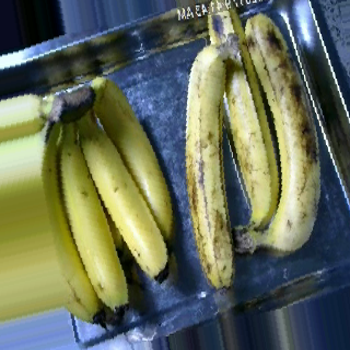

In [ ]:

print(run_example("DocVQA", 'What is the freshness index in the scale of 10?', ds_train[199]['image']))
display(ds_train[199]['image'].resize([350, 350]))

In [ ]:
ds_train=dataset_dict['train']
ds_test=dataset_dict['test']


In [ ]:
from torch.utils.data import Dataset

class DocVQADataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        example = self.data[idx]
        question = "<DocVQA>" +'What is the MRP, Brand Name and Exp date of the product?'
        answer = example['Label']
        image = example['image']
        if image.mode != "RGB":
            image = image.convert("RGB")
        return question, answer, image


In [ ]:
import os
from torch.utils.data import DataLoader
from tqdm import tqdm
from transformers import (AdamW, AutoProcessor, get_scheduler)

def collate_fn(batch):
    questions, answers, images = zip(*batch)
    inputs = processor(text=list(questions), images=list(images), return_tensors="pt", padding=True).to(device)
    return inputs, answers

# Create datasets

train_dataset = DocVQADataset(ds_train)
val_dataset = DocVQADataset(ds_test)

# Create DataLoader
batch_size = 1
num_workers = 0

train_loader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=collate_fn, num_workers=num_workers, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=collate_fn, num_workers=num_workers)

In [ ]:
def train_model(train_loader, val_loader, model, processor, epochs=10, lr=1e-6):
    optimizer = AdamW(model.parameters(), lr=lr)
    num_training_steps = epochs * len(train_loader)
    lr_scheduler = get_scheduler(
        name="linear",
        optimizer=optimizer,
        num_warmup_steps=0,
        num_training_steps=num_training_steps,
    )

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        i = -1
        for batch in tqdm(train_loader, desc=f"Training Epoch {epoch + 1}/{epochs}"):
            i += 1
            inputs, answers = batch

            input_ids = inputs["input_ids"]
            pixel_values = inputs["pixel_values"]
            labels = processor.tokenizer(text=answers, return_tensors="pt", padding=True, return_token_type_ids=False).input_ids.to(device)

            outputs = model(input_ids=input_ids, pixel_values=pixel_values, labels=labels)
            loss = outputs.loss

            loss.backward()
            optimizer.step()
            lr_scheduler.step()
            optimizer.zero_grad()

            train_loss += loss.item()

        avg_train_loss = train_loss / len(train_loader)
        print(f"Average Training Loss: {avg_train_loss}")

        # Validation phase
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch in tqdm(val_loader, desc=f"Validation Epoch {epoch + 1}/{epochs}"):
                inputs, answers = batch

                input_ids = inputs["input_ids"]
                pixel_values = inputs["pixel_values"]
                labels = processor.tokenizer(text=answers, return_tensors="pt", padding=True, return_token_type_ids=False).input_ids.to(device)

                outputs = model(input_ids=input_ids, pixel_values=pixel_values, labels=labels)
                loss = outputs.loss

                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        print(f"Average Validation Loss: {avg_val_loss}")

        # Save model checkpoint
        output_dir1 = f"./model_checkpoints/epoch_{epoch+1}"
        output_dir2 = f"./processor_checkpoints/epoch_{epoch+1}"
        os.makedirs(output_dir1, exist_ok=True)
        os.makedirs(output_dir2, exist_ok=True)
        model.save_pretrained(output_dir1)
        processor.save_pretrained(output_dir2)


In [ ]:
for param in model.vision_tower.parameters():
  param.is_trainable = False
train_model(train_loader, val_loader, model, processor, epochs=20)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Training Epoch 1/20: 100%|██████████| 20/20 [00:14<00:00,  1.42it/s]


Average Training Loss: 0.8568295780569315


Validation Epoch 1/20: 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]


Average Validation Loss: 4.611888647079468


Training Epoch 2/20: 100%|██████████| 20/20 [00:14<00:00,  1.42it/s]


Average Training Loss: 0.7545441634953022


Validation Epoch 2/20: 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]


Average Validation Loss: 4.647395372390747


Training Epoch 3/20: 100%|██████████| 20/20 [00:13<00:00,  1.45it/s]


Average Training Loss: 0.6522672448307276


Validation Epoch 3/20: 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]


Average Validation Loss: 4.7081780433654785


Training Epoch 4/20: 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]


Average Training Loss: 0.5754770588129758


Validation Epoch 4/20: 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]


Average Validation Loss: 4.666978359222412


Training Epoch 5/20: 100%|██████████| 20/20 [00:13<00:00,  1.45it/s]


Average Training Loss: 0.6198652058839798


Validation Epoch 5/20: 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]


Average Validation Loss: 4.649489641189575


Training Epoch 6/20: 100%|██████████| 20/20 [00:13<00:00,  1.43it/s]


Average Training Loss: 0.5271092614158988


Validation Epoch 6/20: 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]


Average Validation Loss: 4.692580938339233


Training Epoch 7/20: 100%|██████████| 20/20 [00:13<00:00,  1.44it/s]


Average Training Loss: 0.43119072187691926


Validation Epoch 7/20: 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]


Average Validation Loss: 4.664127826690674


Training Epoch 8/20: 100%|██████████| 20/20 [00:13<00:00,  1.45it/s]


Average Training Loss: 0.4657939800992608


Validation Epoch 8/20: 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]


Average Validation Loss: 4.6388373374938965


Training Epoch 9/20: 100%|██████████| 20/20 [00:13<00:00,  1.45it/s]


Average Training Loss: 0.41337078912183645


Validation Epoch 9/20: 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]


Average Validation Loss: 4.6491241455078125


Training Epoch 10/20: 100%|██████████| 20/20 [00:13<00:00,  1.45it/s]


Average Training Loss: 0.4122863482683897


Validation Epoch 10/20: 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]


Average Validation Loss: 4.666807174682617


Training Epoch 11/20: 100%|██████████| 20/20 [00:13<00:00,  1.44it/s]


Average Training Loss: 0.3673234526067972


Validation Epoch 11/20: 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]


Average Validation Loss: 4.644451379776001


Training Epoch 12/20: 100%|██████████| 20/20 [00:13<00:00,  1.44it/s]


Average Training Loss: 0.36456675324589016


Validation Epoch 12/20: 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]


Average Validation Loss: 4.671612977981567


Training Epoch 13/20: 100%|██████████| 20/20 [00:13<00:00,  1.44it/s]


Average Training Loss: 0.38729814887046815


Validation Epoch 13/20: 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]


Average Validation Loss: 4.67762303352356


Training Epoch 14/20: 100%|██████████| 20/20 [00:13<00:00,  1.45it/s]


Average Training Loss: 0.35940413512289526


Validation Epoch 14/20: 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]


Average Validation Loss: 4.68187141418457


Training Epoch 15/20: 100%|██████████| 20/20 [00:13<00:00,  1.44it/s]


Average Training Loss: 0.3205837670713663


Validation Epoch 15/20: 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]


Average Validation Loss: 4.673046827316284


Training Epoch 16/20: 100%|██████████| 20/20 [00:13<00:00,  1.45it/s]


Average Training Loss: 0.2965596353635192


Validation Epoch 16/20: 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]


Average Validation Loss: 4.671181678771973


Training Epoch 17/20: 100%|██████████| 20/20 [00:13<00:00,  1.44it/s]


Average Training Loss: 0.2887831525877118


Validation Epoch 17/20: 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]


Average Validation Loss: 4.671620607376099


Training Epoch 18/20: 100%|██████████| 20/20 [00:13<00:00,  1.44it/s]


Average Training Loss: 0.30110885510221125


Validation Epoch 18/20: 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]


Average Validation Loss: 4.679076433181763


Training Epoch 19/20: 100%|██████████| 20/20 [00:13<00:00,  1.44it/s]


Average Training Loss: 0.2977705469354987


Validation Epoch 19/20: 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]


Average Validation Loss: 4.683792591094971


Training Epoch 20/20: 100%|██████████| 20/20 [00:13<00:00,  1.44it/s]


Average Training Loss: 0.28397732246667146


Validation Epoch 20/20: 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]


Average Validation Loss: 4.6838295459747314


In [ ]:
# Function to run the model on an example
def run_example(task_prompt, text_input, image):
    prompt = task_prompt + text_input

    # Ensure the image is in RGB mode
    if image.mode != "RGB":
        image = image.convert("RGB")

    inputs = processor(text=prompt, images=image, return_tensors="pt").to(device)
    generated_ids = model.generate(
        input_ids=inputs["input_ids"],
        pixel_values=inputs["pixel_values"],
        max_new_tokens=1024,
        num_beams=3
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(generated_text, task=task_prompt, image_size=(image.width, image.height))
    return parsed_answer


{'DocVQA': 'MRP is Rs 53 and Exp date is 04/24'}


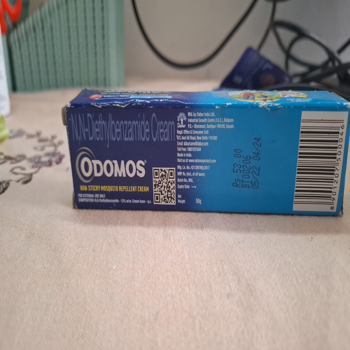

In [ ]:
print(run_example("DocVQA", 'What is the MRP, Brand Name and Exp date of the product if visible in the picture?', ds_train[7]['image']))
display(ds_train[7]['image'].resize([350, 350]))